In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams.update({'font.size': 20})

from scipy.optimize import curve_fit

# The hidden link between static polarisability, $\alpha_0$ and $C_6$

## Introduction

$C_6$ coefficient: *see Lennard-Jones potential*  

Polarisability, $\alpha$ : "Polarizability usually refers to the tendency of matter, when subjected to an electric field, to acquire an electric dipole moment in proportion to that applied field."  [ Wikipedia, https://en.wikipedia.org/wiki/Polarizability ]

Static Polarisabilty, $\alpha_0$: "Static polarizabilities are the first response of the electron density to electric fields" [ https://doi.org/10.1039/C8CP03569E ]

- Polarisability
- Casimir-Polder
- $C_6$

## The link between Static Polarisability $a_0$ and $C_6$ [Gould, 2016]


Gould *et al.* [ Gould 2016: https://doi.org/10.1021/acs.jctc.6b00361 ] have shown that a power law ($C_6 = 1.43 \alpha(0)^{1.45}$, Figure 2 in Gould 2016) correctly describes the relationship between a collection of pairs of **both heteronuclear and homonuclear neutral species**.

They suggest further improvement of the quality of the fit by considering the dependence on the static polarisability of each species, named x and y, seperately. However, instead of modifying the fit or defining function, we consider here only the _unscaled_ PGG $C_6$ **homonuclear** species (from Gould 2016) compared to recommended values of static polarisability from Schwerdtfeger *et al.* (tabulated in Schwerdtfeger 2018: https://doi.org/10.1080/00268976.2018.1535143).

In [2]:
df = pd.DataFrame(columns=["a0", "C6"])
with open('Gould_2016_ModelPGG_Modified_Neutral.dat','r') as file:
    _ = [file.readline() for i in range(12)]
    lst = []
    for i in range(86):
        index, a0, c6 = file.readline().split()
        df.loc[str(int(index))] = [float(a0), float(c6)]

In [3]:
df.head(3)

,a0,C6
1,4.50711,6.50
2,1.38375,1.38
3,164.11250,1343.00


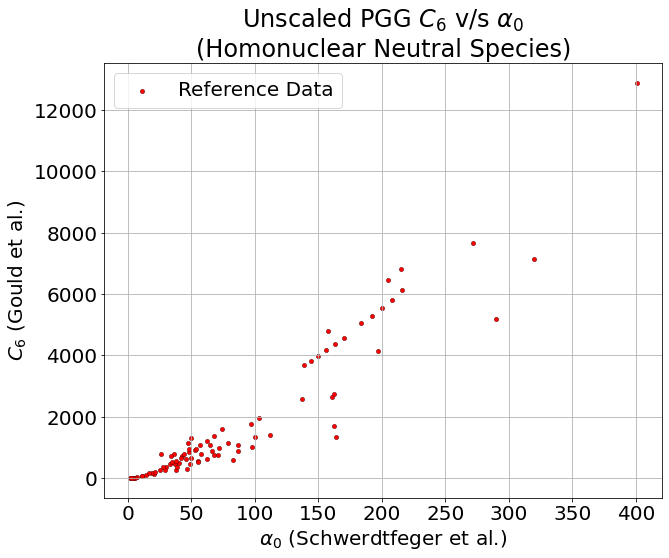

In [4]:
plt.scatter(df["a0"], df["C6"], s=20, color="red", edgecolors= "black", linewidth=0.3, label="Reference Data");

plt.title(r"Unscaled PGG $C_6$ v/s ${\alpha}_0$" "\n" "(Homonuclear Neutral Species)");

plt.xlabel(r"$\alpha_0$ (Schwerdtfeger et al.)");
plt.ylabel(r"$C_6$ (Gould et al.)");

plt.grid();
plt.legend();

### Power Law Fit

In [5]:
def func_power_law(x, a, b):
    return a*(x**b)

In [6]:
popt, pcov = curve_fit(func_power_law, df["a0"], df["C6"]);

$C_6 = 1.43 \alpha(0)^{1.45}$ [ Gould 2016 ]

In [7]:
print(r"Article (Gould 2016) => $C_6$ = 1.43 $\alpha(0)^{ 1.45 }$");
print(r"Power Law Fit        => $C_6$ =", np.round(popt[0], 2), r"$\alpha(0)^{", np.round(popt[1], 2), "}$");

Article (Gould 2016) => $C_6$ = 1.43 $\alpha(0)^{1.45}$
Power Law Fit        => $C_6$ = 4.02 $\alpha(0)^{ 1.34 }$


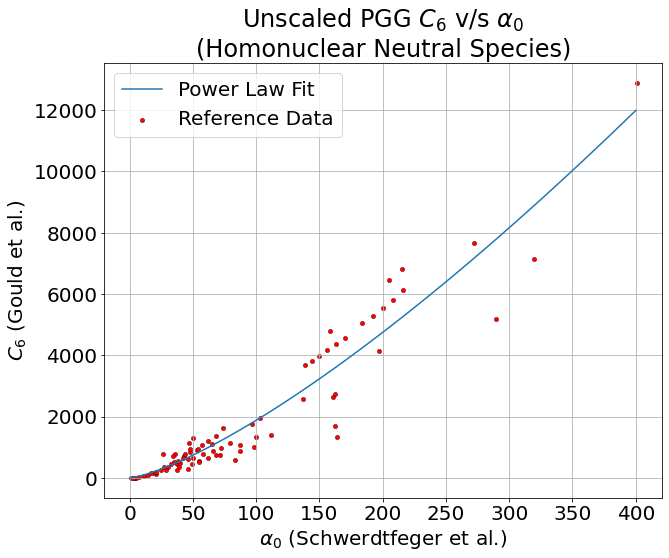

In [8]:
plt.scatter(df["a0"], df["C6"], s=20, color="red", edgecolors= "black", linewidth=0.3, label="Reference Data");

x = np.linspace(0,400)
plt.plot(x, func_power_law(x, popt[0], popt[1]), label="Power Law Fit");

plt.title(r"Unscaled PGG $C_6$ v/s ${\alpha}_0$" "\n" "(Homonuclear Neutral Species)");

plt.xlabel(r"$\alpha_0$ (Schwerdtfeger et al.)");
plt.ylabel(r"$C_6$ (Gould et al.)");

plt.grid();
plt.legend();

In [9]:
# comparison to gould power law fit
## Error of current fit (unscaled C6, and recommended atomic static polarisability)
## Compare to gould power law fit (scaled polarisabilty)

## Extras

## Other files in c6_approximation

In [10]:
# 01_functions : comparison to other functions fit on neutral
# 02_anions_1 : extension to single charge anions
# 03_cations_1 : extension to single charge cations